In [1]:
from pyopenms import *
from urllib.request import urlretrieve
tsg = TheoreticalSpectrumGenerator()
spec1 = MSSpectrum()
peptide = AASequence.fromString("DFPIANGER")

p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1)


print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of DFPIANGER has 8 peaks.
y1+ is generated at m/z 175.118952913371
y2+ is generated at m/z 304.161547136671
y3+ is generated at m/z 361.18301123237103
y4+ is generated at m/z 475.225939423771
y5+ is generated at m/z 546.2630535832709
y6+ is generated at m/z 659.3471179341709
y7+ is generated at m/z 756.3998821574709
y8+ is generated at m/z 903.4682964445708


Text(0, 0.5, 'intensity')

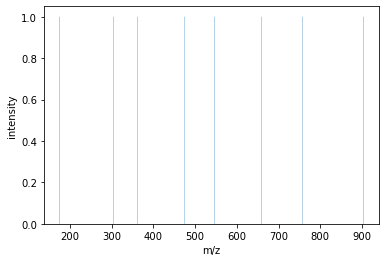

In [2]:
from matplotlib import pyplot as plt

plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")

Text(0, 0.5, 'intensity')

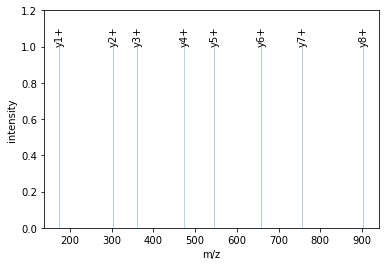

In [3]:
mz,i = spec1.get_peaks()
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False) 
idx = 0
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90)
    idx += 1
plt.ylim(top=1.2)
plt.xlabel("m/z")
plt.ylabel("intensity")

In [5]:
from pyopenms import *
from urllib.request import urlretrieve

dig = ProteaseDigestion()
dig.getEnzymeName() # Trypsin
bsa = "".join([l.strip() for l in open("fares.fasta").readlines()[1:]])
bsa = AASequence.fromString(bsa)
# create all digestion products
result = []
dig.digest(bsa, result)
for s in result:
    print(s.toString())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(s.toString())

    p = Param()
    p.setValue("add_b_ions", "false")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1)


    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())

FPTDDDDK
Spectrum 1 of FPTDDDDK has 7 peaks.
y1+ is generated at m/z 147.112804913371
y2+ is generated at m/z 262.13974907287104
y3+ is generated at m/z 377.166693232371
y4+ is generated at m/z 492.193637391871
y5+ is generated at m/z 607.220581551371
y6+ is generated at m/z 708.2682607746709
y7+ is generated at m/z 805.3210249979709
IVGGYTCAANSIPYQVSLNSGSHFCGGSLINSQWVVSAAHCYK
Spectrum 1 of IVGGYTCAANSIPYQVSLNSGSHFCGGSLINSQWVVSAAHCYK has 42 peaks.
y1+ is generated at m/z 147.112804913371
y2+ is generated at m/z 310.17613420047104
y3+ is generated at m/z 413.185319089971
y4+ is generated at m/z 550.244231313271
y5+ is generated at m/z 621.281345472771
y6+ is generated at m/z 692.318459632271
y7+ is generated at m/z 779.350488791771
y8+ is generated at m/z 878.418903078871
y9+ is generated at m/z 977.4873173659711
y10+ is generated at m/z 1163.566630684971
y11+ is generated at m/z 1291.625208940171
y12+ is generated at m/z 1378.657238099671
y13+ is generated at m/z 1492.7001662910711
y14